# Capstone 2: Experiment Proposal

## Getting to Know the Data

This dataset comes from Lending Club and provides information on all loans made through the platform in the years 2007-2015. Lending Club is a peer to peer lending platform, which means they derive business by matching borrowers with willing lenders. I'll conducting this study and report as a would-be data science consultant for Lending Club. The purpose of this report is to understand the data available to us and to propose an experiment, with the goal of increasing business for Lending Club. We'll start by importing the packages we'll need for our analysis and by reading the data.

In [1]:
# importing packages we'll need
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading the data set
df = pd.read_csv('loan.csv', dtype = {'issue_d': str}, low_memory=False)
# https://www.kaggle.com/wendykan/lending-club-loan-data

Lending Club makes money by charging origination and service fees on each loan made through the platform. Because these fees are directly proportional to the dollar amounts of each loan, if we can find a way to increase the dollar volume of loans made we can increase the revenue and income for the business. Therefore, as we explore this data set we will pay particular attention to the relationship each other variable has to loan size, and also which variables correlate with greater numbers of loans.<br> <br>
In order to begin to understand our data, let's take a look at the summary statistics for the dollar amounts of these loans.

In [3]:
df.loan_amnt.describe()
# getting summary statistics

count    1.048575e+06
mean     1.538487e+04
std      9.533838e+03
min      1.000000e+03
25%      8.000000e+03
50%      1.300000e+04
75%      2.000000e+04
max      4.000000e+04
Name: loan_amnt, dtype: float64

<br>
<br>
The first thing to note is that Lending Club facilitated an amazing 1,048,575 loans over this period! Apparently a lot of people are comfortable investing in these loans. It appears that the range of allowable loan sizes is \$1,000-\$40,000. The mean loan size of \$15,385 looks to be representative of a typical loan based on the 25th, 50th, and 75th percentile values. It looks like loan sizes are more common towards the lower end of the acceptable range, but let's check for sure.
<br>
<br>
<br>

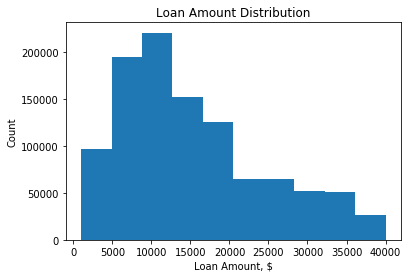

In [4]:
# creating a histogram
plt.hist(df.loan_amnt)
plt.title('Loan Amount Distribution')
plt.ylabel('Count')
plt.xlabel('Loan Amount, $')
plt.show()

We were right, there are definitely more loans toward the lower end of the range. In fact, it looks as though loan sizes follow a gamma distribution. Let's construct a q-q plot to see if this is, in fact, a gamma distribution.
<br>

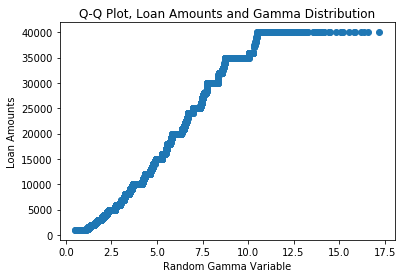

In [5]:
q = np.random.gamma(5, 1, 1048575) # generating a random gamma distribution
q10000 = np.random.choice(q, 10000) # taking 10000 instances
q10000.sort() # sorting for q-q plot
loan_amts = list(df.loan_amnt)
loan_amts10000 = np.random.choice(loan_amts, 10000) # taking 10000 instances
loan_amts10000.sort()# sorting for q-q plot
plt.scatter(x=q10000, y=loan_amts10000)
plt.ylabel('Loan Amounts')
plt.xlabel('Random Gamma Variable')
plt.title('Q-Q Plot, Loan Amounts and Gamma Distribution')
plt.show()

It looks like much of the data follows a rough gamma distribution, except the tail is too fat to truly be considered a gamma distribution.
<br>
<br>
Now that we've explored the loan amounts in the data set, let's take a look at the relative popularity of the two loan terms offered.

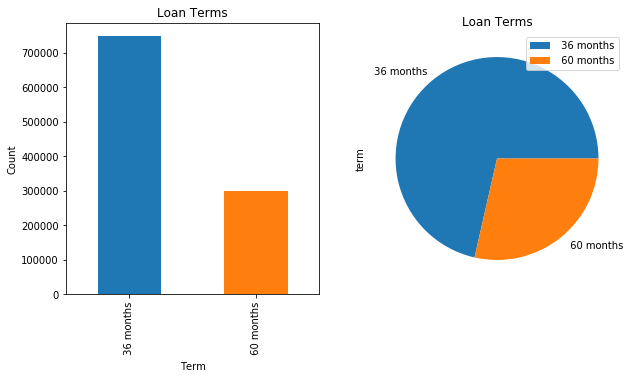

In [6]:
plt.figure(figsize=(10, 5)) #making a subplot

plt.subplot(1, 2, 1)
df.term.value_counts().plot(kind='bar')
plt.title('Loan Terms')
plt.ylabel('Count')
plt.xlabel('Term')

plt.subplot(1, 2, 2)
df.term.value_counts().plot(kind='pie')
plt.title('Loan Terms')
plt.legend()
plt.show()

<br>
So there are two options: a 3 year investment or a 5 year investment. There are also plenty of loans for each option, although three year loans make up the majority at 71%. 
<br>
<br>
The shorter-term loans are much more popular. Let's further investigate the difference between the 3 year loans and the 5 year loans and see where that takes us.

In [7]:
threeyr_loans = df.loc[df['term'] == ' 36 months']
# creating a new dataframe with all 3 yr loans

In [8]:
fiveyr_loans = df.loc[df['term'] == ' 60 months']
# creating a new dataframe with all 5 yr loans

Let's first visually compare the distributions of loan sizes broken down by loan term.

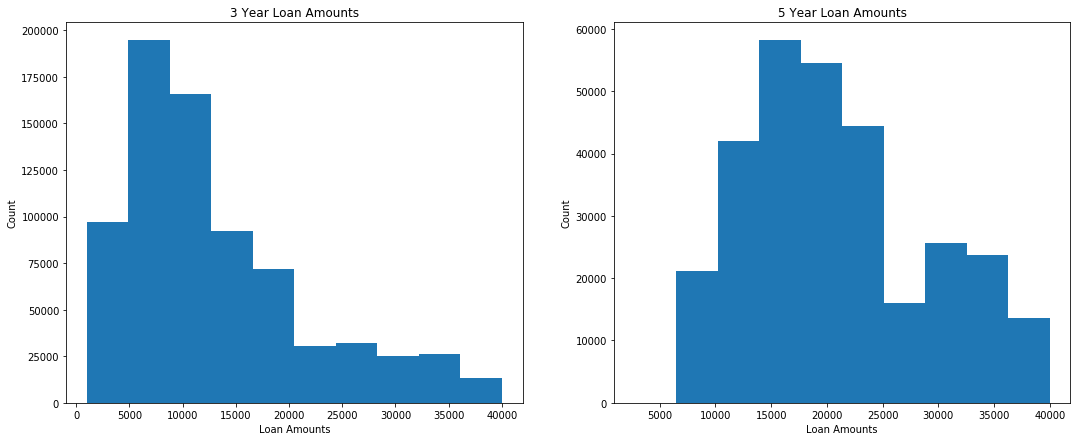

In [9]:
plt.figure(figsize=(18, 7))

plt.subplot(1, 2, 1)
plt.hist(threeyr_loans.loan_amnt)
plt.title('3 Year Loan Amounts')
plt.ylabel('Count')
plt.xlabel('Loan Amounts')

plt.subplot(1, 2, 2)
plt.hist(fiveyr_loans.loan_amnt)
plt.title('5 Year Loan Amounts')
plt.ylabel('Count')
plt.xlabel('Loan Amounts')
plt.show()

It looks like the shorter-term loans cluster at lower loan amounts and the longer-term loans have a greater proportion of loans at the higher end of the spectrum. Let's take a look at the summary statistics for each subset and see what we can glean.

In [10]:
threeyr_loans.loan_amnt.describe()

count    749095.000000
mean      13078.356584
std        8988.280807
min        1000.000000
25%        6000.000000
50%       10000.000000
75%       18000.000000
max       40000.000000
Name: loan_amnt, dtype: float64

In [11]:
fiveyr_loans.loan_amnt.describe()

count    299480.000000
mean      21154.208545
std        8341.311275
min        2750.000000
25%       14950.000000
50%       20000.000000
75%       26400.000000
max       40000.000000
Name: loan_amnt, dtype: float64

The 5 year loans dominate the 3 year loans by every measure, being higher on the average and at each percentile. So we know that there are many more 3 year loans, but 5 year loans bring in over $8000 more per loan on average. Let's now see which loan term brings in more total revenue and profit for Lending Club.

In [12]:
threeyr_loans.loan_amnt.sum()

9796931525

In [13]:
fiveyr_loans.loan_amnt.sum()

6335262375

The 3 year loans have generated a cumulative \\$9,796,931,525 and the 5 year loans have generated a cumulative \\$6,335,262,375. This means that the shorter-term loans have generated almost 50% more revenue than their counterparts. I'm interested to see if this trend would continue with an even shorter loan term, which brings us to the experiment proposal.

## Experiment Proposal

### Hypothesis

My hypothesis is that Lending Club could increase their revenue by offering a new loan term of 18 months. We've already seen that a shorter term generates more revenue with the current options and I'm curious to see if this trend can continue past the current bounds. I'm also assuming for the purposes of this experiment that all revenues are directly proportional to the total value of loans issued, both for the existing loan terms and the new loan terms.

### Rollout

For this experiment I would propose to begin offering 18 month loans, while still offering the same 36 month and 60 month loans currently offered, for a trial period of 12 months. 12 months should be long enough to even out any seasonal fluctuations in business and also long enough to gather data past an initial 'honeymoon' phase in which the new loans might enjoy higher demand due to pent-up demand for shorter loans or due to any marketing campaigns associated with the rollout.

### Evaluation

An important distinction to make is that the one and only goal of introducing 18 month loans is to increase the total revenue of Lending Club. This means that we will be evaluating the growth in total loan volume over the test period, and we will not consider demand for the new loans or growth in their demand as a success in and of itself. In other words, we won't care what the volume of 18 month loans is if it is completely offset by a reduction in the demand for the existing loans.

In [14]:
# making a function to convert input data into a date format
def make_date(a):
    return pd.datetime.strptime(a, '%b-%y')

In [15]:
# testing function
make_date('Dec-18')

datetime.datetime(2018, 12, 1, 0, 0)

In [16]:
# copying issue dates
df['issue_d_two'] = df.issue_d

In [17]:
# applying the function
df.issue_d_two = df.issue_d_two.apply(make_date)

In [18]:
# checking original data vs transformed data
df.iloc[333333]['issue_d']

'May-18'

In [19]:
# checking original data vs transformed data
df.iloc[333333]['issue_d_two']

Timestamp('2018-05-01 00:00:00')

In [20]:
issuedate_df = df[['issue_d_two', 'loan_amnt']]

In [21]:
# creating new dataframe grouped by month of issue
issuedate_df2 = issuedate_df.groupby(['issue_d_two'], as_index=False).sum()
issuedate_df2

,issue_d_two,loan_amnt
0,2015-10-01,560253175
1,2015-11-01,567197325
2,2015-12-01,667910550
3,2016-01-01,518403400
4,2016-02-01,619446250
5,2016-03-01,949367550
6,2016-04-01,537278275
7,2016-05-01,417538850
8,2016-06-01,488623850
9,2016-07-01,488020900


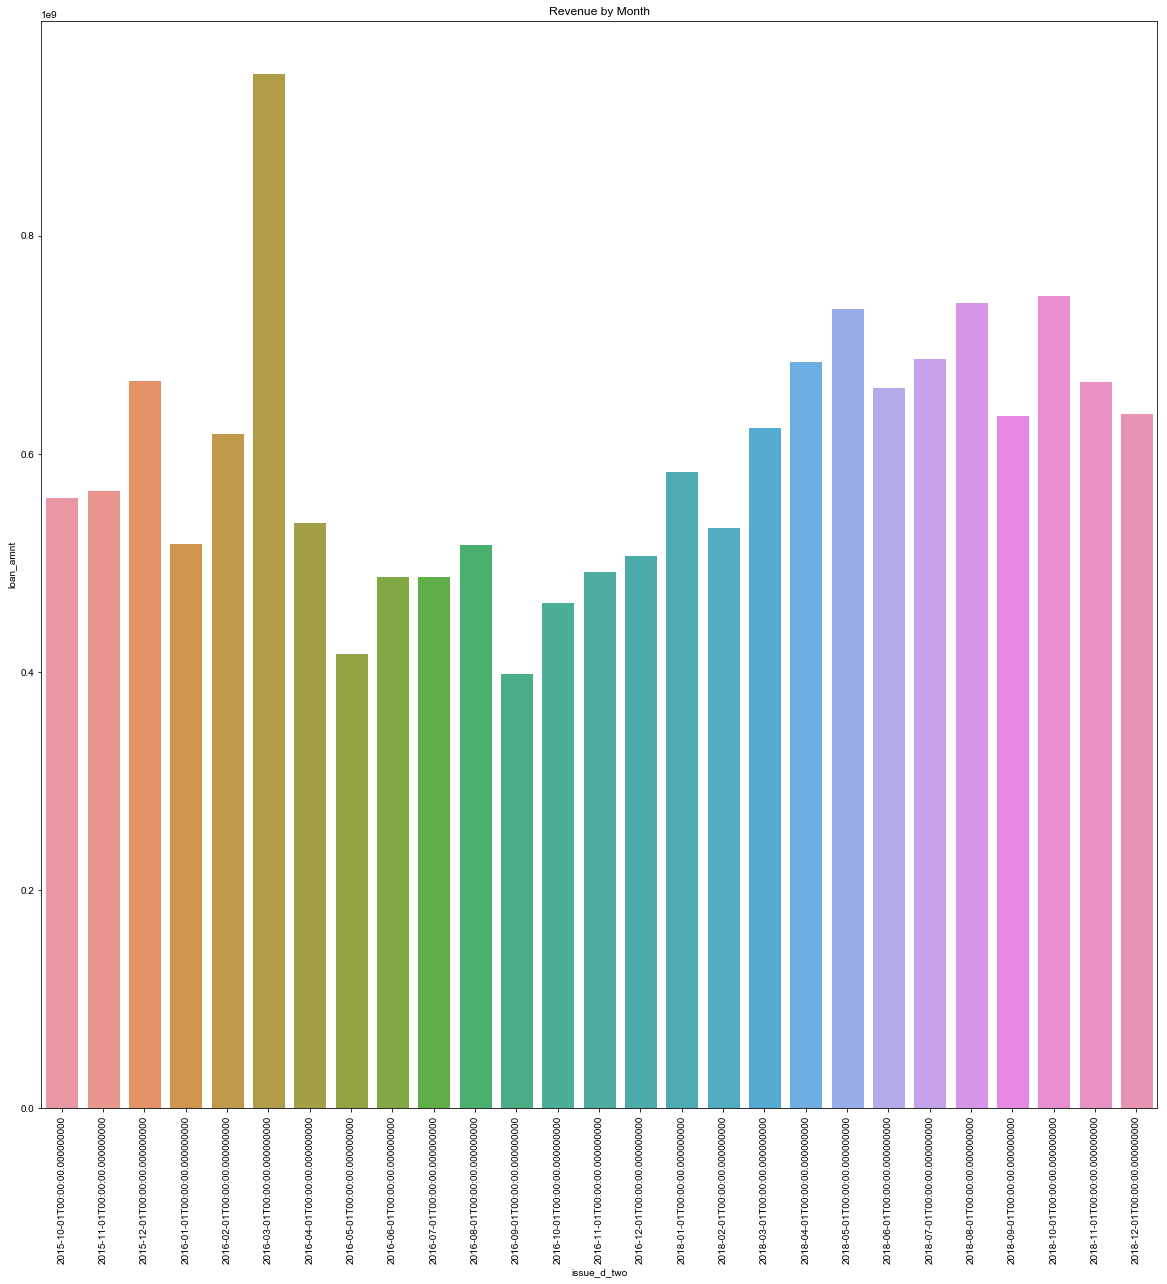

In [22]:
plt.figure(figsize = (20,20))
plt.xticks(rotation=90)
sns.set(style="darkgrid")
sns.barplot(x='issue_d_two', y='loan_amnt', data=issuedate_df2)
plt.title('Revenue by Month')
plt.show()

In [30]:
# initiating growth rate column
issuedate_df2['growth_rate'] = 0.1
issuedate_df2.growth_rate[0] = 0    

C:\Users\dhooker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
# calculating growth rates
for i in range(1, len(issuedate_df2.growth_rate)):
    issuedate_df2.growth_rate[i] = float((issuedate_df2.loan_amnt[i] / issuedate_df2.loan_amnt[i-1]) - 1)
    

C:\Users\dhooker\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


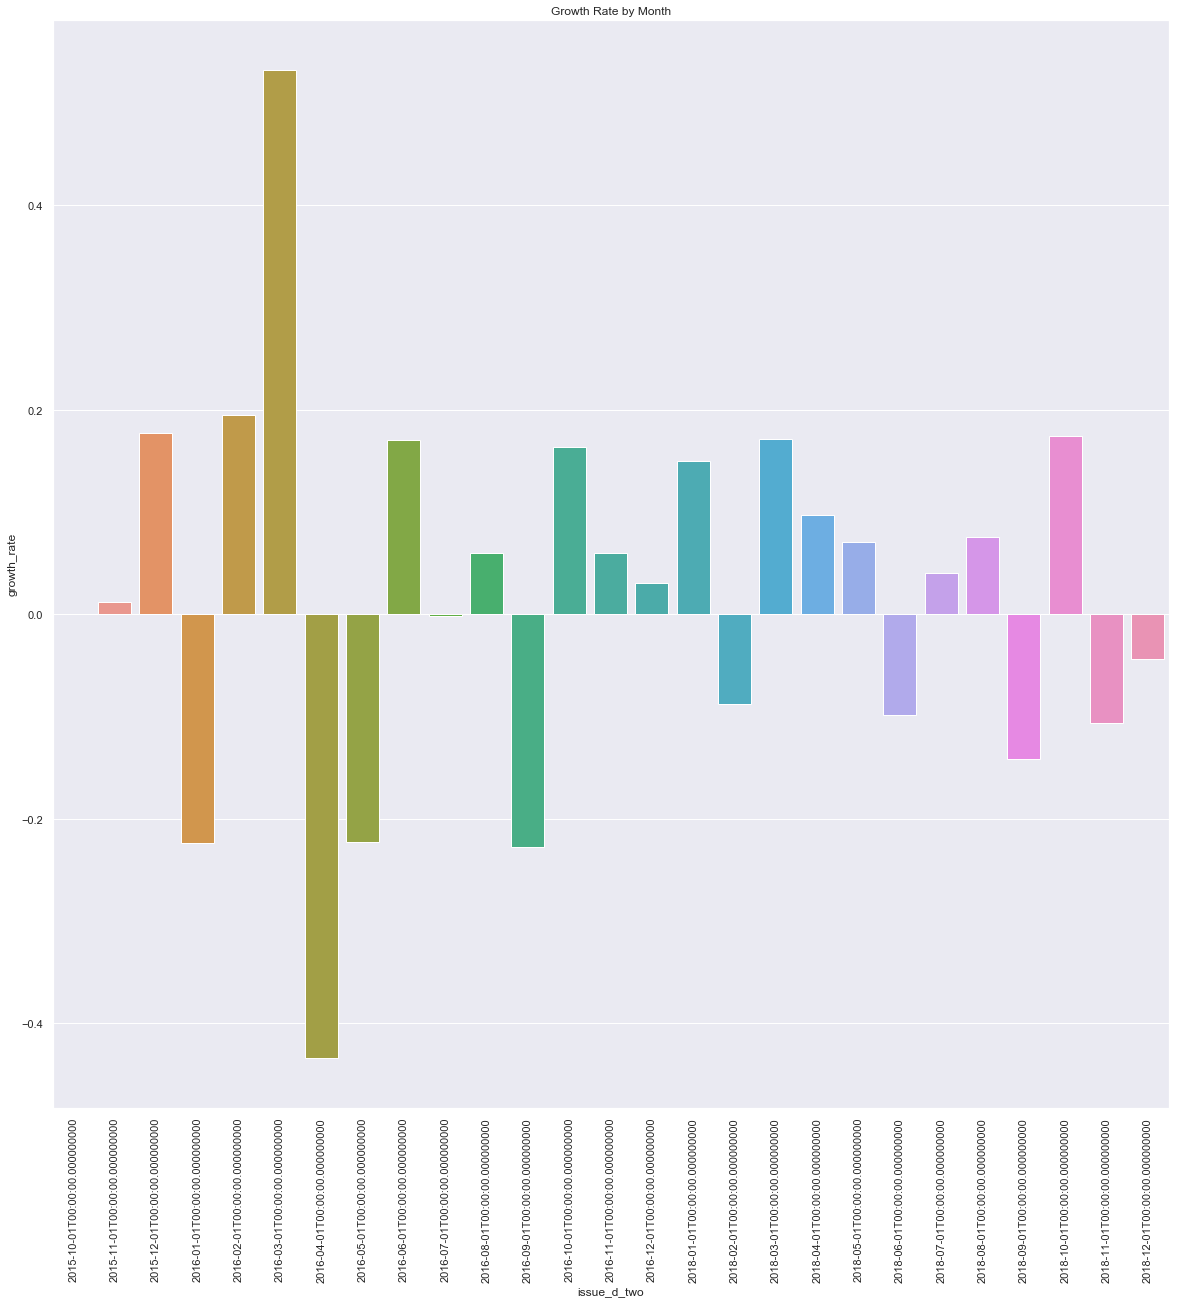

In [32]:
plt.figure(figsize = (20,20))
plt.xticks(rotation=90)
sns.set(style="darkgrid")
sns.barplot(x='issue_d_two', y='growth_rate', data=issuedate_df2)
plt.title('Growth Rate by Month')
plt.show()

In [33]:
issuedate_df2

,issue_d_two,loan_amnt,growth_rate
0,2015-10-01,560253175,0.000000
1,2015-11-01,567197325,0.012395
2,2015-12-01,667910550,0.177563
3,2016-01-01,518403400,-0.223843
4,2016-02-01,619446250,0.194912
5,2016-03-01,949367550,0.532607
6,2016-04-01,537278275,-0.434067
7,2016-05-01,417538850,-0.222863
8,2016-06-01,488623850,0.170248
9,2016-07-01,488020900,-0.001234


There doesn't appear to be any seasonal pattern to the growth rate of loan volume on a monthly basis. In 3 of the last 4 months and 4 of the last 7 the growth rate has been negative. Before exploring this data I had imagined revenue had been steadily increasing and that the revenue over the testing period would have to exceed this existing positive growth rate by some amount in order to be considered successful. However, I now would suggest keeping the new loan offering if it can manage to keep revenue from declining over the test period.